In [1]:
import os
import sys

root_folder = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(root_folder)

import numpy as np
import numpy.linalg as la
import numpy.matlib as matl
import scipy.io as io
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib widget

cpu
Loading data from root/dataset/random_target_forest/torch/...Completed, DATA IS NOT SHUFFLED YET.



Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


GPT size: 11.1M parameters
Running for horizon = 10
Running for horizon = 20
Running for horizon = 30
Running for horizon = 40
Running for horizon = 50
Running for horizon = 60
Running for horizon = 70
Running for horizon = 80
Running for horizon = 90
Running for horizon = 100


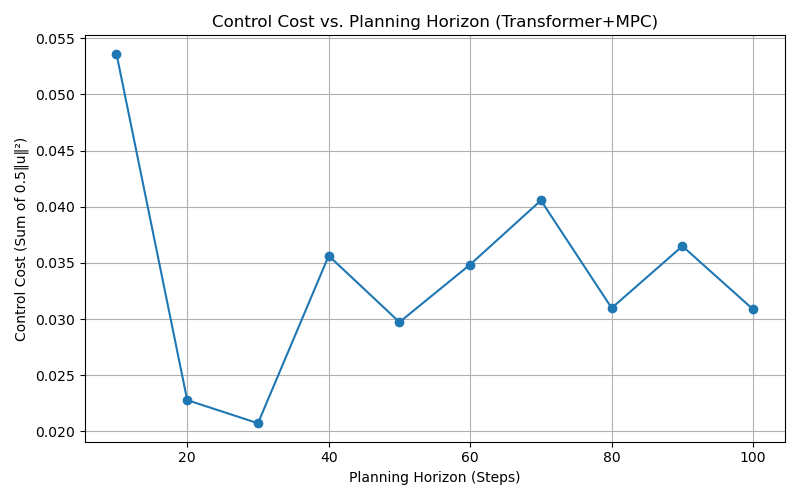

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from decision_transformer.manage import get_DT_model, get_train_val_test_data, transformer_import_config
from decision_transformer.art_closed_loop import AutonomousQuadrotorTransformerMPC
from dynamics.QuadEnv import QuadEnv
from dynamics.quadrotor import sample_init_target
import optimization.quad_scenario as quad

# Load model config and data
model_name = 'checkpoint_quad_random_forest_ctgrtg'
config = transformer_import_config(model_name)
datasets, dataloaders = get_train_val_test_data(config['mdp_constr'], config['dataset_scenario'], config['timestep_norm'])
train_loader, _, test_loader = dataloaders

# Load model
model = get_DT_model(model_name, train_loader, _)

# Planning horizons to test
planning_horizons = list(range(10, 101, 10))
costs = []

for H in planning_horizons:
    print(f"Running for horizon = {H}")
    # Initialize environment
    dt, x_init, x_goal = quad.dt, *sample_init_target()
    env = QuadEnv(config['dataset_scenario'])
    env.reset('det', reset_condition=(dt, x_init, x_goal))

    # Setup MPC
    artmpc = AutonomousQuadrotorTransformerMPC(
        model=model,
        test_loader=test_loader,
        n_steps=H,
        transformer_mode='dyn',
        ctg_clipped=True,
        scp_mode='soft'
    )

    J = 0
    try:
        for t in range(quad.n_time_rpod):
            obs = env.get_observation()
            rtg_0 = 0  # use dummy RTG if needed
            art_traj = artmpc.warmstart(obs, env, rtg0=rtg_0, ctg0=0)
            mpc_traj, _ = artmpc.solve_scp(obs, env, art_traj['state'], art_traj['dv'])
            u = mpc_traj['dv'][:, 0]
            J += 0.5 * np.linalg.norm(u) ** 2
            env.load_prediction(art_traj, mpc_traj)
            env.step(u)
    except Exception as e:
        print(f"H={H}: Error - {e}")
        J = np.nan

    costs.append(J)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(planning_horizons, costs, marker='o')
plt.xlabel("Planning Horizon (Steps)")
plt.ylabel("Control Cost (Sum of 0.5‖u‖²)")
plt.title("Control Cost vs. Planning Horizon (Transformer+MPC)")
plt.grid(True)
plt.tight_layout()
plt.show()


# DAGGER Analysis

In [2]:
an = []
name_file = 'ws_analysis_DAGGER'
'''an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/' + name_file + '4.npz'))'''
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/' + name_file + '10.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/' + name_file + '20.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/' + name_file + '30.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/' + name_file + '40.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/' + name_file + '50.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/' + name_file + '60.npz'))
'''an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/' + name_file + '70.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/' + name_file + '80.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/' + name_file + '90.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/' + name_file + '100.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/planning_horizon_analysis/ws_analysis_DAGGER10.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/planning_horizon_analysis/ws_analysis_DAGGER20.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/planning_horizon_analysis/ws_analysis_DAGGER30.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/planning_horizon_analysis/ws_analysis_DAGGER40.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/planning_horizon_analysis/ws_analysis_DAGGER50.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/planning_horizon_analysis/ws_analysis_DAGGER60.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/planning_horizon_analysis/ws_analysis_DAGGER70.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/planning_horizon_analysis/ws_analysis_DAGGER80.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/planning_horizon_analysis/ws_analysis_DAGGER90.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/planning_horizon_analysis/ws_analysis_DAGGER100.npz'))'''
'''an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/ws_analysis_DAGGER10noisy.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/ws_analysis_DAGGER20noisy.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/ws_analysis_DAGGER30noisy.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/ws_analysis_DAGGER40noisy.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/ws_analysis_DAGGER50noisy.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/ws_analysis_DAGGER60noisy.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/ws_analysis_DAGGER70noisy.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/ws_analysis_DAGGER80noisy.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/ws_analysis_DAGGER90noisy.npz'))
an.append(np.load(root_folder + '/optimization/saved_files/closed_loop/ws_analysis_DAGGER100noisy.npz'))'''

FileNotFoundError: [Errno 2] No such file or directory: '/data/evelasco11/transformermpc-ral24/drone/optimization/saved_files/closed_loop/ws_analysis_DAGGER20.npz'

In [ ]:
ix_sample = []
ix = []
J_cvx = []
J_cvxMPC = []
J_myocvxMPC = []
J_artMPC = []
J_artMPC_dag0 = []
J_artMPC_dag1 = []
J_artMPC_dag2 = []
J_artMPC_dag3 = []
J_artMPC_dag4 = []
J_artMPC_dag5 = []
J_artMPC_dag6 = []
J_artMPC_dag7 = []
J_artMPC_dag8 = []
J_artMPC_dag9 = []
time_cvxMPC = []
time_myocvxMPC = []
time_artMPC = []
time_artMPC_dag0 = []
time_artMPC_dag1 = []
time_artMPC_dag2 = []
time_artMPC_dag3 = []
time_artMPC_dag4 = []
time_artMPC_dag5 = []
time_artMPC_dag6 = []
time_artMPC_dag7 = []
time_artMPC_dag8 = []
time_artMPC_dag9 = []
ctgs0_cvx = []
cvx_problem = []
i_unfeas_cvx = []
i_unfeas_cvxMPC = []
i_unfeas_myocvxMPC = []
i_unfeas_artMPC = []
i_unfeas_artMPC_dag0 = []
i_unfeas_artMPC_dag1 = []
i_unfeas_artMPC_dag2 = []
i_unfeas_artMPC_dag3 = []
i_unfeas_artMPC_dag4 = []
i_unfeas_artMPC_dag5 = []
i_unfeas_artMPC_dag6 = []
i_unfeas_artMPC_dag7 = []
i_unfeas_artMPC_dag8 = []
i_unfeas_artMPC_dag9 = []

for i in range(len(an)):
    ix_sample.append(an[i]['test_dataset_ix'])
    ix.append(np.arange(len(an[i]['test_dataset_ix'])))
    J_cvx.append(an[i]['J_cvx'])
    J_cvxMPC.append(an[i]['J_cvxMPC'])
    J_myocvxMPC.append(an[i]['J_myocvxMPC'])
    J_artMPC.append(an[i]['J_artMPC'])
    J_artMPC_dag0.append(an[i]['J_artMPC_dag0'])
    J_artMPC_dag1.append(an[i]['J_artMPC_dag1'])
    J_artMPC_dag2.append(an[i]['J_artMPC_dag2'])
    J_artMPC_dag3.append(an[i]['J_artMPC_dag3'])
    J_artMPC_dag4.append(an[i]['J_artMPC_dag4'])
    J_artMPC_dag5.append(an[i]['J_artMPC_dag5'])
    J_artMPC_dag6.append(an[i]['J_artMPC_dag6'])
    J_artMPC_dag7.append(an[i]['J_artMPC_dag7'] if 'J_artMPC_dag7' in an[i].keys() else np.full((len(ix[i]),), np.nan))
    J_artMPC_dag8.append(an[i]['J_artMPC_dag8'] if 'J_artMPC_dag8' in an[i].keys() else np.full((len(ix[i]),), np.nan))
    J_artMPC_dag9.append(an[i]['J_artMPC_dag9'] if 'J_artMPC_dag9' in an[i].keys() else np.full((len(ix[i]),), np.nan))
    time_cvxMPC.append(an[i]['time_cvxMPC'])
    time_myocvxMPC.append(an[i]['time_myocvxMPC'])
    time_artMPC.append(an[i]['time_artMPC'])
    time_artMPC_dag0.append(an[i]['time_artMPC_dag0'])
    time_artMPC_dag1.append(an[i]['time_artMPC_dag1'])
    time_artMPC_dag2.append(an[i]['time_artMPC_dag2'])
    time_artMPC_dag3.append(an[i]['time_artMPC_dag3'])
    time_artMPC_dag4.append(an[i]['time_artMPC_dag4'])
    time_artMPC_dag5.append(an[i]['time_artMPC_dag5'])
    time_artMPC_dag6.append(an[i]['time_artMPC_dag6'])
    time_artMPC_dag7.append(an[i]['time_artMPC_dag7'] if 'time_artMPC_dag7' in an[i].keys() else np.full((len(ix[i]),100), np.nan))
    time_artMPC_dag8.append(an[i]['time_artMPC_dag8'] if 'time_artMPC_dag8' in an[i].keys() else np.full((len(ix[i]),100), np.nan))
    time_artMPC_dag9.append(an[i]['time_artMPC_dag9'] if 'time_artMPC_dag9' in an[i].keys() else np.full((len(ix[i]),100), np.nan))
    ctgs0_cvx.append(an[i]['ctgs0_cvx'])
    cvx_problem.append(an[i]['cvx_problem'])
    i_unfeas_cvx.append(an[i]['i_unfeas_cvx'])
    i_unfeas_cvxMPC.append(an[i]['i_unfeas_cvxMPC'])
    i_unfeas_myocvxMPC.append(an[i]['i_unfeas_myocvxMPC'])
    i_unfeas_artMPC.append(an[i]['i_unfeas_artMPC'] if len(an[i]['i_unfeas_artMPC']) < len(ix[i][ctgs0_cvx[i] >= 1]) else len(ix[i])*[None])
    i_unfeas_artMPC_dag0.append(an[i]['i_unfeas_artMPC_dag0'] if len(an[i]['i_unfeas_artMPC_dag0']) < len(ix[i][ctgs0_cvx[i] >= 1]) else len(ix[i])*[None])
    i_unfeas_artMPC_dag1.append(an[i]['i_unfeas_artMPC_dag1'] if len(an[i]['i_unfeas_artMPC_dag1']) < len(ix[i][ctgs0_cvx[i] >= 1]) else len(ix[i])*[None])
    i_unfeas_artMPC_dag2.append(an[i]['i_unfeas_artMPC_dag2'] if len(an[i]['i_unfeas_artMPC_dag2']) < len(ix[i][ctgs0_cvx[i] >= 1]) else len(ix[i])*[None])
    i_unfeas_artMPC_dag3.append(an[i]['i_unfeas_artMPC_dag3'] if len(an[i]['i_unfeas_artMPC_dag3']) < len(ix[i][ctgs0_cvx[i] >= 1]) else len(ix[i])*[None])
    i_unfeas_artMPC_dag4.append(an[i]['i_unfeas_artMPC_dag4'] if len(an[i]['i_unfeas_artMPC_dag4']) < len(ix[i][ctgs0_cvx[i] >= 1]) else len(ix[i])*[None])
    i_unfeas_artMPC_dag5.append(an[i]['i_unfeas_artMPC_dag5'] if len(an[i]['i_unfeas_artMPC_dag5']) < len(ix[i][ctgs0_cvx[i] >= 1]) else len(ix[i])*[None])
    i_unfeas_artMPC_dag6.append(an[i]['i_unfeas_artMPC_dag6'] if len(an[i]['i_unfeas_artMPC_dag6']) < len(ix[i][ctgs0_cvx[i] >= 1]) else len(ix[i])*[None])
    i_unfeas_artMPC_dag7.append(an[i]['i_unfeas_artMPC_dag7'] if (('i_unfeas_artMPC_dag7' in an[i].keys()) and len(an[i]['i_unfeas_artMPC_dag7']) < len(ix[i][ctgs0_cvx[i] >= 1])) else len(ix[i])*[None])
    i_unfeas_artMPC_dag8.append(an[i]['i_unfeas_artMPC_dag8'] if (('i_unfeas_artMPC_dag8' in an[i].keys()) and len(an[i]['i_unfeas_artMPC_dag8']) < len(ix[i][ctgs0_cvx[i] >= 1])) else len(ix[i])*[None])
    i_unfeas_artMPC_dag9.append(an[i]['i_unfeas_artMPC_dag9'] if (('i_unfeas_artMPC_dag9' in an[i].keys()) and len(an[i]['i_unfeas_artMPC_dag9']) < len(ix[i][ctgs0_cvx[i] >= 1])) else len(ix[i])*[None])

In [ ]:
for i in range(len(an)):
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    print('Unfeasible cvx: ', len(i_unfeas_cvx[i]))
    print('Unfeasible cvxMPC: ', len(i_unfeas_cvxMPC[i]))
    print('Unfeasible myocvxMPC: ', len(i_unfeas_myocvxMPC[i]))
    print('Unfeasible artMPC: ', len(i_unfeas_artMPC[i]))
    print('Unfeasible artMPC_dag0: ', len(i_unfeas_artMPC_dag0[i]))
    print('Unfeasible artMPC_dag1: ', len(i_unfeas_artMPC_dag1[i]))
    print('Unfeasible artMPC_dag2: ', len(i_unfeas_artMPC_dag2[i]))
    print('Unfeasible artMPC_dag3: ', len(i_unfeas_artMPC_dag3[i]))
    print('Unfeasible artMPC_dag4: ', len(i_unfeas_artMPC_dag4[i]))
    print('Unfeasible artMPC_dag5: ', len(i_unfeas_artMPC_dag5[i]))
    print('Unfeasible artMPC_dag6: ', len(i_unfeas_artMPC_dag6[i]))
    print('Unfeasible artMPC_dag7: ', len(i_unfeas_artMPC_dag7[i]))
    print('Unfeasible artMPC_dag8: ', len(i_unfeas_artMPC_dag8[i]))
    print('Unfeasible artMPC_dag9: ', len(i_unfeas_artMPC_dag9[i]))

In [ ]:
ix_ctgs0_ge_1_comparison = []
for i in range(len(an)):
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    ix_unfeas = set(i_unfeas_cvx[i]).union(set(i_unfeas_cvxMPC[i])).union(set(i_unfeas_artMPC[i])).union(set(i_unfeas_artMPC_dag0[i])).union(set(i_unfeas_artMPC_dag1[i])).union(set(i_unfeas_artMPC_dag2[i])).union(set(i_unfeas_artMPC_dag3[i])).union(set(i_unfeas_myocvxMPC[i]))
    ix_unfeas = ix_unfeas.union(set(i_unfeas_artMPC_dag4[i])).union(i_unfeas_artMPC_dag5[i]).union(i_unfeas_artMPC_dag6[i]).union(i_unfeas_artMPC_dag7[i]).union(i_unfeas_artMPC_dag8[i]).union(i_unfeas_artMPC_dag9[i])
    ix_feas_comparison = set(ix[i]) - ix_unfeas - set([-1])
    print('Feasible samples for comparison', len(ix_feas_comparison))
    ctgs_selector = (ctgs0_cvx[i] >= 1) & (ctgs0_cvx[i] <= 50)
    ix_ctgs0_ge_1 = set(ix[i][ctgs_selector])
    print('Samples with ctgs0 of interest', len(ix_ctgs0_ge_1))
    ix_ctgs0_ge_1_comparison.append(ix_feas_comparison.intersection(ix_ctgs0_ge_1))
    print('Samples with ctgs0 of insterest for comparison', len(ix_ctgs0_ge_1_comparison[i]))

In [ ]:
mean_costs_list = []
std_costs_list = []
mean_time_list = []
ctgs0_set = []
ctgs0_count = []
scale = 1000
for i in range(len(an)):
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    # Selection for comparison
    J_cvx_comp = J_cvx[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_cvxMPC_comp = J_cvxMPC[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_myocvxMPC_comp = J_myocvxMPC[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_comp = J_artMPC[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag0_comp = J_artMPC_dag0[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag1_comp = J_artMPC_dag1[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag2_comp = J_artMPC_dag2[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag3_comp = J_artMPC_dag3[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag4_comp = J_artMPC_dag4[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag5_comp = J_artMPC_dag5[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag6_comp = J_artMPC_dag6[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag7_comp = J_artMPC_dag7[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag8_comp = J_artMPC_dag8[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag9_comp = J_artMPC_dag9[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    time_cvxMPC_comp = time_cvxMPC[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_myocvxMPC_comp = time_myocvxMPC[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_comp = time_artMPC[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag0_comp = time_artMPC_dag0[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag1_comp = time_artMPC_dag1[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag2_comp = time_artMPC_dag2[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag3_comp = time_artMPC_dag3[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag4_comp = time_artMPC_dag4[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag5_comp = time_artMPC_dag5[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag6_comp = time_artMPC_dag6[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag7_comp = time_artMPC_dag7[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag8_comp = time_artMPC_dag8[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag9_comp = time_artMPC_dag9[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    ctgs0_cvx_comp = ctgs0_cvx[i][list(ix_ctgs0_ge_1_comparison[i])].copy()

    # Ordered results for ctgs0
    ctgs0_set.append(set(ctgs0_cvx_comp))
    mean_costs_list.append({
        'cvx' : np.zeros((len(ctgs0_set[i],))),
        'cvxMPC' : np.zeros((len(ctgs0_set[i],))),
        'myocvxMPC' : np.zeros((len(ctgs0_set[i],))),
        'artMPC' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag0' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag1' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag2' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag3' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag4' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag5' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag6' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag7' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag8' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag9' : np.zeros((len(ctgs0_set[i],))),
    })
    mean_time_list.append({
        'cvxMPC' : np.zeros((len(ctgs0_set[i]),100)),
        'myocvxMPC' : np.zeros((len(ctgs0_set[i]),100)),
        'artMPC' : np.zeros((len(ctgs0_set[i]),100)),
        'artMPC_dag0' : np.zeros((len(ctgs0_set[i]),100)),
        'artMPC_dag1' : np.zeros((len(ctgs0_set[i]),100)),
        'artMPC_dag2' : np.zeros((len(ctgs0_set[i]),100)),
        'artMPC_dag3' : np.zeros((len(ctgs0_set[i]),100)),
        'artMPC_dag4' : np.zeros((len(ctgs0_set[i]),100)),
        'artMPC_dag5' : np.zeros((len(ctgs0_set[i]),100)),
        'artMPC_dag6' : np.zeros((len(ctgs0_set[i]),100)),
        'artMPC_dag7' : np.zeros((len(ctgs0_set[i]),100)),
        'artMPC_dag8' : np.zeros((len(ctgs0_set[i]),100)),
        'artMPC_dag9' : np.zeros((len(ctgs0_set[i]),100)),
    })
    ctgs0_count.append(np.zeros((len(ctgs0_set[i],))))

    for j,ctg in enumerate(ctgs0_set[i]):
        idx_ctg = ctgs0_cvx_comp >= ctg
        #idx_ctg = (ctgs0_cvx_comp >= np.floor(ctg/10)*10) & (ctgs0_cvx_comp <= (np.floor(ctg/10) + 1)*10)
        mean_costs_list[i]['cvx'][j] = J_cvx_comp[idx_ctg].mean()

        mean_costs_list[i]['cvxMPC'][j] = J_cvxMPC_comp[idx_ctg].mean()
        mean_costs_list[i]['myocvxMPC'][j] = J_myocvxMPC_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC'][j] = J_artMPC_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag0'][j] = J_artMPC_dag0_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag1'][j] = J_artMPC_dag1_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag2'][j] = J_artMPC_dag2_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag3'][j] = J_artMPC_dag3_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag4'][j] = J_artMPC_dag4_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag5'][j] = J_artMPC_dag5_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag6'][j] = J_artMPC_dag6_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag7'][j] = J_artMPC_dag7_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag8'][j] = J_artMPC_dag8_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag9'][j] = J_artMPC_dag9_comp[idx_ctg].mean()

        # Time
        mean_time_list[i]['cvxMPC'][j] = time_cvxMPC_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['myocvxMPC'][j] = time_myocvxMPC_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['artMPC'][j] = time_artMPC_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['artMPC_dag0'][j] = time_artMPC_dag0_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['artMPC_dag1'][j] = time_artMPC_dag1_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['artMPC_dag2'][j] = time_artMPC_dag2_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['artMPC_dag3'][j] = time_artMPC_dag3_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['artMPC_dag4'][j] = time_artMPC_dag4_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['artMPC_dag5'][j] = time_artMPC_dag5_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['artMPC_dag6'][j] = time_artMPC_dag6_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['artMPC_dag7'][j] = time_artMPC_dag7_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['artMPC_dag8'][j] = time_artMPC_dag8_comp[idx_ctg].mean(axis=0)
        mean_time_list[i]['artMPC_dag9'][j] = time_artMPC_dag9_comp[idx_ctg].mean(axis=0)
        ctgs0_count[i][j] = idx_ctg.sum()

In [ ]:
#plt.style.use('seaborn-v0_8-colorblind')
ctgs0_list = []
for i, mean_costs in enumerate(mean_costs_list):
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    ctgs0_list.append(list(ctgs0_set[i]))
    #mpl.style.use('seaborn-v0_8')
    fig, ax1 = plt.subplots(figsize=(10,7))
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
    ax1.plot(ctgs0_list[i], (mean_costs['cvxMPC'] - mean_costs['cvx'])*scale, c='orange', marker='o', label='cvxMPC')
    '''ax1.plot(ctgs0_list, (mean_costs['artMPC'] - mean_costs['cvx'])*scale,  c='red', alpha = 0.2, marker='s', label='artMPC')
    ax1.plot(ctgs0_list, (mean_costs['artMPC_dag0'] - mean_costs['cvx'])*scale, c='red', alpha = 0.5, marker='s', label='artMPC_dag0')
    ax1.plot(ctgs0_list, (mean_costs['artMPC_dag1'] - mean_costs['cvx'])*scale, c='red', alpha = 0.75, marker='s', label='artMPC_dag1')
    ax1.plot(ctgs0_list, (mean_costs['artMPC_dag2'] - mean_costs['cvx'])*scale, c='red', alpha = 1, marker='s', label='artMPC_dag2')
    ax1.plot(ctgs0_list, (mean_costs['artMPC_dag3'] - mean_costs['cvx'])*scale, c='darkred', alpha = 0.2, marker='s', label='artMPC_dag3')
    ax1.plot(ctgs0_list, (mean_costs['artMPC_dag4'] - mean_costs['cvx'])*scale, c='darkred', alpha = 0.5, marker='s', label='artMPC_dag4')
    ax1.plot(ctgs0_list, (mean_costs['artMPC_dag5'] - mean_costs['cvx'])*scale, c='darkred', alpha = 0.75, marker='s', label='artMPC_dag5')
    ax1.plot(ctgs0_list, (mean_costs['artMPC_dag6'] - mean_costs['cvx'])*scale, c='darkred', alpha = 1, marker='s', label='artMPC_dag6')'''
    #ax1.plot(ctgs0_list, (mean_costs['artMPC'] - mean_costs['cvx'])*scale,  c='red', marker='s', label='artMPC')
    if i == 0:
        '''ax1.plot(ctgs0_list[i], (mean_costs['artMPC'] - mean_costs['cvx'])*scale, c='darkred', alpha = 0.15, marker='s', label='artMPC')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag0'] - mean_costs['cvx'])*scale, c='darkred', alpha = 0.25, label='artMPC_dag0')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag1'] - mean_costs['cvx'])*scale, c='darkred', alpha = 0.35, label='artMPC_dag1')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag2'] - mean_costs['cvx'])*scale, c='darkred', alpha = 0.45, label='artMPC_dag2')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag3'] - mean_costs['cvx'])*scale, c='darkred', alpha = 0.55,label='artMPC_dag3')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag4'] - mean_costs['cvx'])*scale, c='darkred', alpha = 0.65, label='artMPC_dag4')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag5'] - mean_costs['cvx'])*scale, c='darkred', alpha = 0.75, label='artMPC_dag5')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag6'] - mean_costs['cvx'])*scale, c='darkred', alpha = 0.85, label='artMPC_dag6')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag7'] - mean_costs['cvx'])*scale, c='darkred', alpha = 1., marker='s', label='artMPC_dag7')'''
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC'] - mean_costs['cvx'])*scale, marker='s', label='artMPC')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag0'] - mean_costs['cvx'])*scale, label='artMPC_dag0')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag1'] - mean_costs['cvx'])*scale, label='artMPC_dag1')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag2'] - mean_costs['cvx'])*scale, label='artMPC_dag2')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag3'] - mean_costs['cvx'])*scale, label='artMPC_dag3')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag4'] - mean_costs['cvx'])*scale, label='artMPC_dag4')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag5'] - mean_costs['cvx'])*scale, label='artMPC_dag5')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag6'] - mean_costs['cvx'])*scale, marker='s',label='artMPC_dag6')
        '''ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag7'] - mean_costs['cvx'])*scale, marker='s', label='artMPC_dag7')'''
    elif i == 1:
        '''ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag3'] - mean_costs['cvx'])*scale, c='green', alpha = 0.2, label='artMPC_dag3')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag4'] - mean_costs['cvx'])*scale, c='green', alpha = 0.5, marker='s', label='artMPC_dag4')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag5'] - mean_costs['cvx'])*scale, c='green', alpha = 0.7, label='artMPC_dag5')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag6'] - mean_costs['cvx'])*scale, c='green', alpha = 1., label='artMPC_dag6')'''
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC'] - mean_costs['cvx'])*scale, marker='s', label='artMPC')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag0'] - mean_costs['cvx'])*scale, label='artMPC_dag0')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag1'] - mean_costs['cvx'])*scale, label='artMPC_dag1')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag2'] - mean_costs['cvx'])*scale, label='artMPC_dag2')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag3'] - mean_costs['cvx'])*scale, label='artMPC_dag3')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag4'] - mean_costs['cvx'])*scale, label='artMPC_dag4')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag5'] - mean_costs['cvx'])*scale, label='artMPC_dag5')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag6'] - mean_costs['cvx'])*scale, marker='s', label='artMPC_dag6')
        '''ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag7'] - mean_costs['cvx'])*scale, marker='s', label='artMPC_dag7')'''
    elif i == 2:
        ax1.plot(ctgs0_list[i-1], (mean_costs_list[i-1]['artMPC_dag4'] - mean_costs_list[i-1]['cvx'])*scale, c='blue', marker='s', alpha = 0.1, label='artMPC_dag4')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag5'] - mean_costs['cvx'])*scale, c='blue', alpha = 0.2, label='artMPC_dag5')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag6'] - mean_costs['cvx'])*scale, c='blue', alpha = 0.4, label='artMPC_dag6')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag7'] - mean_costs['cvx'])*scale, c='blue', alpha = 0.6, label='artMPC_dag7')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag8'] - mean_costs['cvx'])*scale, c='blue', alpha = 0.8, label='artMPC_dag8')
        ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag9'] - mean_costs['cvx'])*scale, c='blue', alpha = 1., marker='s', label='artMPC_dag9')
    ax1.plot(ctgs0_list[i], (mean_costs['cvx'] - mean_costs['cvx'])*scale,'k--',label='Lower bound')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
    ax1.set_xlabel('$ctgs_0$')
    ax1.set_ylabel('$J - J_{cvx}$ [mm/s]', color='#D93637')
    ax1.tick_params(axis='y', labelcolor='#D93637')
    ax2 = ax1.twinx()
    ax2.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
    ax2.plot(ctgs0_list[i], ctgs0_count[i],c='C0')
    ax2.tick_params(axis='y', labelcolor='C0')
    ax2.set_ylabel('#Samples', color='C0')

'''fig, ax1 = plt.subplots(figsize=(10,7))
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
ax1.plot(ctgs0_list[0], (mean_costs_list[0]['cvxMPC'] - mean_costs_list[0]['cvx'])*scale, c='orange', marker='o', label='cvxMPC')
ax1.plot(ctgs0_list[0], (mean_costs_list[0]['artMPC'] - mean_costs_list[0]['cvx'])*scale, c='darkred', alpha = 0.2, label='artMPC')+
ax1.plot(ctgs0_list[0], (mean_costs_list[0]['artMPC_dag3'] - mean_costs_list[0]['cvx'])*scale, c='darkred', alpha = 0.61, marker='s',label='artMPC_dag3')
ax1.plot(ctgs0_list[1], (mean_costs_list[1]['artMPC_dag4'] - mean_costs_list[1]['cvx'])*scale, c='green', alpha = 0.5, marker='s', label='artMPC_dag4')
ax1.plot(ctgs0_list[2], (mean_costs_list[2]['artMPC_dag9'] - mean_costs_list[2]['cvx'])*scale, c='blue', alpha = 1., marker='o', label='artMPC_dag9')
ax1.plot(ctgs0_list[i], (mean_costs['cvx'] - mean_costs['cvx'])*scale,'k--',label='Lower bound')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
ax1.set_xlabel('$ctgs_0$')
ax1.set_ylabel('$J - J_{cvx}$ [mm/s]', color='#D93637')'''
plt.show()

# Models comparison
1) Plot comparing the performances of different models as a function of the ctg0 of the maneuver, keeping the planning horizon H fixed

In [ ]:
ctgs0_list = []
for i, mean_costs in enumerate(mean_costs_list):
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    ctgs0_list.append(list(ctgs0_set[i]))
    #mpl.style.use('seaborn-v0_8-colorblind')
    fig, ax1 = plt.subplots(figsize=(8,5))
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
    ax1.set_title('Planning horizon ' + str(i*10 + 10))
    '''ax2 = ax1.twinx()
    ax2.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
    ax2.plot(ctgs0_list[i], ctgs0_count[i],c='C0')
    ax2.tick_params(axis='y', labelcolor='C0')
    ax2.set_ylabel('#Samples', color='C0')'''
    ax1.plot(ctgs0_list[i], (mean_costs['cvxMPC'] - mean_costs['cvx'])*scale, c = 'orangered', marker='o', label='cvxMPC')
    ax1.plot(ctgs0_list[i], (mean_costs['myocvxMPC'] - mean_costs['cvx'])*scale, c = 'orange', marker='o', label='myocvxMPC')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC'] - mean_costs['cvx'])*scale, c = 'darkred', alpha=0.05, marker='s', label='artMPC')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag0'] - mean_costs['cvx'])*scale, c = 'darkred', alpha=0.1, label='artMPC_dag1')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag1'] - mean_costs['cvx'])*scale, c = 'darkred', alpha=0.25, label='artMPC_dag2')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag2'] - mean_costs['cvx'])*scale, c = 'darkred', alpha=0.4, label='artMPC_dag3')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag3'] - mean_costs['cvx'])*scale, c = 'darkred', alpha=0.55, label='artMPC_dag4')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag4'] - mean_costs['cvx'])*scale, c = 'darkred', alpha=0.7, label='artMPC_dag5')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag5'] - mean_costs['cvx'])*scale, c = 'darkred', alpha=0.85, label='artMPC_dag6')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag6'] - mean_costs['cvx'])*scale, c = 'darkred', alpha=1., marker='*', label='artMPC_dag7')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag7'] - mean_costs['cvx'])*scale, c = 'darkred', alpha=1., marker='^', label='artMPC_dag8')
    '''ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag3'] - mean_costs['cvx'])*scale, label='artMPC_dag_Hr_6')'''
    ax1.plot(ctgs0_list[i], (mean_costs['cvx'] - mean_costs['cvx'])*scale,'k--',label='Lower bound')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
    ax1.set_xlabel('$ctgs_0$')
    ax1.set_ylabel('$J - J_{cvx}$ [mm/s]', c='#D93637')
    ax1.tick_params(axis='y', labelcolor='#D93637')

plt.show()

In [ ]:
ctgs0_list = []
for i, mean_costs in enumerate(mean_costs_list):
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    ctgs0_list.append(list(ctgs0_set[i]))
    #mpl.style.use('seaborn-v0_8-colorblind')
    fig, ax1 = plt.subplots(figsize=(8,5))
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
    ax1.set_title('Planning horizon ' + str(i*10 + 10))
    ax2 = ax1.twinx()
    ax2.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
    ax2.plot(ctgs0_list[i], ctgs0_count[i],c='C0')
    ax2.tick_params(axis='y', labelcolor='C0')
    ax2.set_ylabel('#Samples', color='C0')
    ax1.plot(ctgs0_list[i], (mean_costs['cvxMPC'] - mean_costs['cvx'])*scale, c = 'orangered', marker='o', label='cvxMPC')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC'] - mean_costs['cvx'])*scale, c = 'darkred', marker='s', label='artMPC_v2_cl_10')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag0'] - mean_costs['cvx'])*scale, c = 'sienna', label='artMPC_v2_cl_11')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag1'] - mean_costs['cvx'])*scale, c = 'darksalmon', label='artMPC_v3_cl_10')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag2'] - mean_costs['cvx'])*scale, c = 'darkorange', marker='^', label='artMPC_v3_cl_11')
    '''ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag3'] - mean_costs['cvx'])*scale, label='artMPC_dag_Hr_6')'''
    ax1.plot(ctgs0_list[i], (mean_costs['cvx'] - mean_costs['cvx'])*scale,'k--',label='Lower bound')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    ax1.set_xlabel('$ctgs_0$')
    ax1.set_ylabel('$J - J_{cvx}$ [mm/s]', c='#D93637')
    ax1.tick_params(axis='y', labelcolor='#D93637')

'''fig, ax1 = plt.subplots(figsize=(10,7))
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
ax1.plot(ctgs0_list[0], (mean_costs_list[0]['cvxMPC'] - mean_costs_list[0]['cvx'])*scale, c='orange', marker='o', label='cvxMPC')
ax1.plot(ctgs0_list[0], (mean_costs_list[0]['artMPC'] - mean_costs_list[0]['cvx'])*scale, c='darkred', alpha = 0.2, label='artMPC')+
ax1.plot(ctgs0_list[0], (mean_costs_list[0]['artMPC_dag3'] - mean_costs_list[0]['cvx'])*scale, c='darkred', alpha = 0.61, marker='s',label='artMPC_dag3')
ax1.plot(ctgs0_list[1], (mean_costs_list[1]['artMPC_dag4'] - mean_costs_list[1]['cvx'])*scale, c='green', alpha = 0.5, marker='s', label='artMPC_dag4')
ax1.plot(ctgs0_list[2], (mean_costs_list[2]['artMPC_dag9'] - mean_costs_list[2]['cvx'])*scale, c='blue', alpha = 1., marker='o', label='artMPC_dag9')
ax1.plot(ctgs0_list[i], (mean_costs['cvx'] - mean_costs['cvx'])*scale,'k--',label='Lower bound')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
ax1.set_xlabel('$ctgs_0$')
ax1.set_ylabel('$J - J_{cvx}$ [mm/s]', color='#D93637')'''
plt.show()

In [ ]:

for model in mean_costs_list[0].keys():
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    if model == 'artMPC_dag5':
        break
    #mpl.style.use('seaborn-v0_8')
    fig, ax1 = plt.subplots(figsize=(10,7))
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
    ax1.set_title('Model ' + str(model))
    ctgs0_list = []
    for i, mean_costs in enumerate(mean_costs_list):
        ctgs0_list.append(list(ctgs0_set[i]))
        if model == 'artMPC':
            label ='artMPC'+'_H'+str(i*10+10)
        elif model == 'artMPC_dag0':
            label = 'artMPC_dag1'+'_H'+str(i*10+10)
        elif model == 'artMPC_dag1':
            label = 'artMPC_dag2'+'_H'+str(i*10+10)
        elif model == 'artMPC_dag2':
            label = 'artMPC_dag3'+'_H'+str(i*10+10)
        elif model == 'artMPC_dag3':
            label ='artMPC_dag4'+'_H'+str(i*10+10)
        elif model == 'artMPC_dag4':
            label = 'artMPC_dag5'+'_H'+str(i*10+10)
        else: label = model+'_H'+str(i*10+10)
        ax1.plot(ctgs0_list[i], (mean_costs[model] - mean_costs['cvx'])*scale, marker='o', label=label)
    ax1.plot(ctgs0_list[i], (mean_costs['cvx'] - mean_costs['cvx'])*scale,'k--',label='Lower bound')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
    ax1.set_xlabel('$ctgs_0$')
    ax1.set_ylabel('$J - J_{cvx}$ [mm/s]', color='#D93637')
    ax1.tick_params(axis='y', labelcolor='#D93637')
    '''ax2 = ax1.twinx()
    ax2.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
    ax2.plot(ctgs0_list[i], ctgs0_count[i],c='C0')
    ax2.tick_params(axis='y', labelcolor='C0')
    ax2.set_ylabel('#Samples', color='C0')'''

1. - Plot for comparing the computational times

2) Plot comparing the mean and std of the different models' performance as a fucntion of the planning horizon

In [ ]:
mean_trend = np.zeros((10,len(mean_costs_list)))
std_trend = np.zeros((10,len(mean_costs_list)))
percentage = True
for i, mean_costs in enumerate(mean_costs_list):
    # convexMPC
    mean_trend[0,i] = ((mean_costs['cvxMPC'] - mean_costs['cvx'])/mean_costs['cvx']).mean() if percentage else (mean_costs['cvxMPC'] - mean_costs['cvx']).mean()
    std_trend[0,i] = ((mean_costs['cvxMPC'] - mean_costs['cvx'])/mean_costs['cvx']).std() if percentage else (mean_costs['cvxMPC'] - mean_costs['cvx']).std()
    # artMPC
    mean_trend[1,i] = ((mean_costs['artMPC'] - mean_costs['cvx'])/mean_costs['cvx']).mean() if percentage else (mean_costs['artMPC'] - mean_costs['cvx']).mean()
    std_trend[1,i] = ((mean_costs['artMPC'] - mean_costs['cvx'])/mean_costs['cvx']).std() if percentage else (mean_costs['artMPC'] - mean_costs['cvx']).std()
    # artMPC_dag_1
    mean_trend[2,i] = ((mean_costs['artMPC_dag0'] - mean_costs['cvx'])/mean_costs['cvx']).mean() if percentage else (mean_costs['artMPC_dag0'] - mean_costs['cvx']).mean()
    std_trend[2,i] = ((mean_costs['artMPC_dag0'] - mean_costs['cvx'])/mean_costs['cvx']).std() if percentage else (mean_costs['artMPC_dag0'] - mean_costs['cvx']).std()
    # artMPC_dag_2 #3
    mean_trend[3,i] = ((mean_costs['artMPC_dag1'] - mean_costs['cvx'])/mean_costs['cvx']).mean() if percentage else (mean_costs['artMPC_dag1'] - mean_costs['cvx']).mean()
    std_trend[3,i] = ((mean_costs['artMPC_dag1'] - mean_costs['cvx'])/mean_costs['cvx']).std() if percentage else (mean_costs['artMPC_dag1'] - mean_costs['cvx']).std()
    # artMPC_dag_3 #5
    mean_trend[4,i] = ((mean_costs['artMPC_dag2'] - mean_costs['cvx'])/mean_costs['cvx']).mean() if percentage else (mean_costs['artMPC_dag2'] - mean_costs['cvx']).mean()
    std_trend[4,i] = ((mean_costs['artMPC_dag2'] - mean_costs['cvx'])/mean_costs['cvx']).std() if percentage else (mean_costs['artMPC_dag2'] - mean_costs['cvx']).std()
    # artMPC_dag_4 #6
    mean_trend[5,i] = ((mean_costs['artMPC_dag3'] - mean_costs['cvx'])/mean_costs['cvx']).mean() if percentage else (mean_costs['artMPC_dag3'] - mean_costs['cvx']).mean()
    std_trend[5,i] = ((mean_costs['artMPC_dag3'] - mean_costs['cvx'])/mean_costs['cvx']).std() if percentage else (mean_costs['artMPC_dag3'] - mean_costs['cvx']).std()
    # artMPC_dag_5 #8
    mean_trend[6,i] = ((mean_costs['artMPC_dag4'] - mean_costs['cvx'])/mean_costs['cvx']).mean() if percentage else (mean_costs['artMPC_dag4'] - mean_costs['cvx']).mean()
    std_trend[6,i] = ((mean_costs['artMPC_dag4'] - mean_costs['cvx'])/mean_costs['cvx']).std() if percentage else (mean_costs['artMPC_dag4'] - mean_costs['cvx']).std()
    # artMPC_dag_6
    mean_trend[7,i] = ((mean_costs['artMPC_dag5'] - mean_costs['cvx'])/mean_costs['cvx']).mean() if percentage else (mean_costs['artMPC_dag5'] - mean_costs['cvx']).mean()
    std_trend[7,i] = ((mean_costs['artMPC_dag5'] - mean_costs['cvx'])/mean_costs['cvx']).std() if percentage else (mean_costs['artMPC_dag5'] - mean_costs['cvx']).std()
    # artMPC_dag_7
    mean_trend[8,i] = ((mean_costs['artMPC_dag6'] - mean_costs['cvx'])/mean_costs['cvx']).mean() if percentage else (mean_costs['artMPC_dag6'] - mean_costs['cvx']).mean()
    std_trend[8,i] = ((mean_costs['artMPC_dag6'] - mean_costs['cvx'])/mean_costs['cvx']).std() if percentage else (mean_costs['artMPC_dag6'] - mean_costs['cvx']).std()
    # artMPC_dag_8
    mean_trend[9,i] = ((mean_costs['artMPC_dag7'] - mean_costs['cvx'])/mean_costs['cvx']).mean() if percentage else (mean_costs['artMPC_dag7'] - mean_costs['cvx']).mean()
    std_trend[9,i] = ((mean_costs['artMPC_dag7'] - mean_costs['cvx'])/mean_costs['cvx']).std() if percentage else (mean_costs['artMPC_dag7'] - mean_costs['cvx']).std()

In [ ]:
planning_horizons = np.arange(10, len(mean_costs_list)*10+1, 10)
i_plot_0 = 0
scale = 100

fig, ax1 = plt.subplots(figsize=(10,10))
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
ax1.plot(planning_horizons[i_plot_0:], mean_trend[0,i_plot_0:]*scale, c='orangered', marker='o', label='cvxMPC')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[0,i_plot_0:]-std_trend[0,i_plot_0:])*scale, (mean_trend[0,i_plot_0:]+std_trend[0,i_plot_0:])*scale, alpha=0.2, facecolor='orangered')

ax1.plot(planning_horizons[i_plot_0:], mean_trend[1,i_plot_0:]*scale, c='darkred', alpha=0.05, marker='s', label='artMPC')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[1,i_plot_0:]-std_trend[1,i_plot_0:])*scale, (mean_trend[1,i_plot_0:]+std_trend[1,i_plot_0:])*scale, alpha=0.05*0.2, facecolor='darkred')
'''
ax1.plot(planning_horizons[i_plot_0:], mean_trend[2,i_plot_0:]*scale, c='darkred', alpha=0.1, label='artMPC_dag_1')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[2,i_plot_0:]-std_trend[2,i_plot_0:])*scale, (mean_trend[2,i_plot_0:]+std_trend[2,i_plot_0:])*scale, alpha=0.1*0.2, facecolor='darkred')'''

ax1.plot(planning_horizons[i_plot_0:], mean_trend[3,i_plot_0:]*scale, c='darkred', alpha=0.25, label='artMPC_dag_2')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[3,i_plot_0:]-std_trend[3,i_plot_0:])*scale, (mean_trend[3,i_plot_0:]+std_trend[3,i_plot_0:])*scale, alpha=0.25*0.2, facecolor='darkred')

'''ax1.plot(planning_horizons[i_plot_0:], mean_trend[4,i_plot_0:]*scale, c='darkred', alpha=0.4, label='artMPC_dag_3')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[4,i_plot_0:]-std_trend[4,i_plot_0:])*scale, (mean_trend[4,i_plot_0:]+std_trend[4,i_plot_0:])*scale, alpha=0.4*0.2, facecolor='darkred')

ax1.plot(planning_horizons[i_plot_0:], mean_trend[5,i_plot_0:]*scale, c='darkred', alpha=0.55, label='artMPC_dag_4')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[5,i_plot_0:]-std_trend[5,i_plot_0:])*scale, (mean_trend[5,i_plot_0:]+std_trend[5,i_plot_0:])*scale, alpha=0.55*0.2, facecolor='darkred')'''

ax1.plot(planning_horizons[i_plot_0:], mean_trend[6,i_plot_0:]*scale, c='darkred', alpha=0.7, label='artMPC_dag_5')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[6,i_plot_0:]-std_trend[6,i_plot_0:])*scale, (mean_trend[6,i_plot_0:]+std_trend[6,i_plot_0:])*scale, alpha=0.7*0.2, facecolor='darkred')

'''ax1.plot(planning_horizons[i_plot_0:], mean_trend[7,i_plot_0:]*scale, c='darkred', alpha=0.85, label='artMPC_dag_6')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[7,i_plot_0:]-std_trend[7,i_plot_0:])*scale, (mean_trend[7,i_plot_0:]+std_trend[7,i_plot_0:])*scale, alpha=0.85*0.2, facecolor='darkred')'''

ax1.plot(planning_horizons[i_plot_0:], mean_trend[8,i_plot_0:]*scale, c='darkred', alpha=1., marker='^', label='artMPC_dag_7')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[8,i_plot_0:]-std_trend[8,i_plot_0:])*scale, (mean_trend[8,i_plot_0:]+std_trend[8,i_plot_0:])*scale, alpha=1.*0.2, facecolor='darkred')

'''ax1.plot(planning_horizons[i_plot_0:], mean_trend[9,i_plot_0:]*scale, c='darkred', alpha=1., marker='^', label='artMPC_dag_8')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[9,i_plot_0:]-std_trend[9,i_plot_0:])*scale, (mean_trend[9,i_plot_0:]+std_trend[9,i_plot_0:])*scale, alpha=1.*0.2, facecolor='darkred')'''


'''ax1.plot(planning_horizons, mean_trend[5,:]*scale, label='artMPC_dag_Hr_6')
ax1.fill_between(planning_horizons, (mean_trend[5,:]-std_trend[5,:])*scale, (mean_trend[5,:]+std_trend[5,:])*scale, alpha=0.2)'''
ax1.plot(planning_horizons[i_plot_0:], np.zeros_like(planning_horizons[i_plot_0:])*scale,'k--',label='Lower bound')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
ax1.set_xlabel('$H_{plan}$')
ax1.set_ylabel(r'$\frac{J - J_{cvx}}{J_{cvx}}$ [%]', color='#D93637', fontsize=13)
ax1.tick_params(axis='y', labelcolor='#D93637')
ax1.set_ylim([0,2000])
'''ax1.set_yscale('log')'''

In [ ]:
planning_horizons = np.arange(10, len(mean_costs_list)*10+1, 10)
i_plot_0 = 0
scale = 100

fig, ax1 = plt.subplots(figsize=(10,10))
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
ax1.plot(planning_horizons[i_plot_0:], mean_trend[0,i_plot_0:]*scale, c='orangered', marker='o', label='cvxMPC')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[0,i_plot_0:]-std_trend[0,i_plot_0:])*scale, (mean_trend[0,i_plot_0:]+std_trend[0,i_plot_0:])*scale, alpha=0.2, facecolor='orangered')

ax1.plot(planning_horizons[i_plot_0:], mean_trend[1,i_plot_0:]*scale, c='darkred', alpha=1., marker='s', label='artMPC')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[1,i_plot_0:]-std_trend[1,i_plot_0:])*scale, (mean_trend[1,i_plot_0:]+std_trend[1,i_plot_0:])*scale, alpha=0.2, facecolor='darkred')
'''
ax1.plot(planning_horizons[i_plot_0:], mean_trend[2,i_plot_0:]*scale, c='darkred', alpha=0.1, label='artMPC_dag_1')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[2,i_plot_0:]-std_trend[2,i_plot_0:])*scale, (mean_trend[2,i_plot_0:]+std_trend[2,i_plot_0:])*scale, alpha=0.1*0.2, facecolor='darkred')'''

ax1.plot(planning_horizons[i_plot_0:], mean_trend[3,i_plot_0:]*scale, c='sienna', alpha=1., label='artMPC_dag_2')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[3,i_plot_0:]-std_trend[3,i_plot_0:])*scale, (mean_trend[3,i_plot_0:]+std_trend[3,i_plot_0:])*scale, alpha=0.2, facecolor='sienna')

'''ax1.plot(planning_horizons[i_plot_0:], mean_trend[4,i_plot_0:]*scale, c='darkred', alpha=0.4, label='artMPC_dag_3')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[4,i_plot_0:]-std_trend[4,i_plot_0:])*scale, (mean_trend[4,i_plot_0:]+std_trend[4,i_plot_0:])*scale, alpha=0.4*0.2, facecolor='darkred')

ax1.plot(planning_horizons[i_plot_0:], mean_trend[5,i_plot_0:]*scale, c='darkred', alpha=0.55, label='artMPC_dag_4')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[5,i_plot_0:]-std_trend[5,i_plot_0:])*scale, (mean_trend[5,i_plot_0:]+std_trend[5,i_plot_0:])*scale, alpha=0.55*0.2, facecolor='darkred')'''

ax1.plot(planning_horizons[i_plot_0:], mean_trend[6,i_plot_0:]*scale, c='darksalmon', alpha=1., label='artMPC_dag_5')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[6,i_plot_0:]-std_trend[6,i_plot_0:])*scale, (mean_trend[6,i_plot_0:]+std_trend[6,i_plot_0:])*scale, alpha=0.2, facecolor='darksalmon')

'''ax1.plot(planning_horizons[i_plot_0:], mean_trend[7,i_plot_0:]*scale, c='darkred', alpha=0.85, label='artMPC_dag_6')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[7,i_plot_0:]-std_trend[7,i_plot_0:])*scale, (mean_trend[7,i_plot_0:]+std_trend[7,i_plot_0:])*scale, alpha=0.85*0.2, facecolor='darkred')'''

ax1.plot(planning_horizons[i_plot_0:], mean_trend[8,i_plot_0:]*scale, c='darkorange', alpha=1., marker='^', label='artMPC_dag_7')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[8,i_plot_0:]-std_trend[8,i_plot_0:])*scale, (mean_trend[8,i_plot_0:]+std_trend[8,i_plot_0:])*scale, alpha=0.2, facecolor='darkorange')

'''ax1.plot(planning_horizons[i_plot_0:], mean_trend[9,i_plot_0:]*scale, c='darkred', alpha=1., marker='^', label='artMPC_dag_8')
ax1.fill_between(planning_horizons[i_plot_0:], (mean_trend[9,i_plot_0:]-std_trend[9,i_plot_0:])*scale, (mean_trend[9,i_plot_0:]+std_trend[9,i_plot_0:])*scale, alpha=1.*0.2, facecolor='darkred')'''


'''ax1.plot(planning_horizons, mean_trend[5,:]*scale, label='artMPC_dag_Hr_6')
ax1.fill_between(planning_horizons, (mean_trend[5,:]-std_trend[5,:])*scale, (mean_trend[5,:]+std_trend[5,:])*scale, alpha=0.2)'''
ax1.plot(planning_horizons[i_plot_0:], np.zeros_like(planning_horizons[i_plot_0:])*scale,'k--',label='Lower bound')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
ax1.set_xlabel('$H_{plan}$')
ax1.set_ylabel(r'$\frac{J - J_{cvx}}{J_{cvx}}$ [%]', color='#D93637', fontsize=13)
ax1.tick_params(axis='y', labelcolor='#D93637')
'''ax1.set_yscale('log')'''

3) Box plot per la distribuzione su tutto il dataset e non mediando l'andamento mediato per ctgs

In [ ]:
h_dataset = [[],[],[],[],[],[],[],[],[],[]]
mean_trend = np.zeros((10,len(mean_costs_list)))
first_quart = np.zeros((10,len(mean_costs_list)))
third_quart = np.zeros((10,len(mean_costs_list)))
percentage = False
for i in range(len(an)):
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    # Selection for comparison
    J_cvx_comp = J_cvx[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_cvxMPC_comp = J_cvxMPC[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_comp = J_artMPC[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag0_comp = J_artMPC_dag0[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag1_comp = J_artMPC_dag1[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag2_comp = J_artMPC_dag2[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag3_comp = J_artMPC_dag3[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag4_comp = J_artMPC_dag4[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag5_comp = J_artMPC_dag5[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag6_comp = J_artMPC_dag6[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag7_comp = J_artMPC_dag7[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag8_comp = J_artMPC_dag8[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag9_comp = J_artMPC_dag9[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    time_cvxMPC_comp = time_cvxMPC[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_comp = time_artMPC[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag0_comp = time_artMPC_dag0[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag1_comp = time_artMPC_dag1[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag2_comp = time_artMPC_dag2[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag3_comp = time_artMPC_dag3[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag4_comp = time_artMPC_dag4[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag5_comp = time_artMPC_dag5[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag6_comp = time_artMPC_dag6[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag7_comp = time_artMPC_dag7[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag8_comp = time_artMPC_dag8[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag9_comp = time_artMPC_dag9[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    ctgs0_cvx_comp = ctgs0_cvx[i][list(ix_ctgs0_ge_1_comparison[i])].copy()

    # convexMPC
    h_dataset[0].append(100*(J_cvxMPC_comp - J_cvx_comp)/J_cvx_comp if percentage else 1000*(J_cvxMPC_comp - J_cvx_comp))
    '''mean_trend[0,i] = (100*(J_cvxMPC_comp - J_cvx_comp)/J_cvx_comp).mean()
    first_quart[0,i] = np.percentile(100*(J_cvxMPC_comp - J_cvx_comp)/J_cvx_comp, 25)
    third_quart[0,i] = np.percentile(100*(J_cvxMPC_comp - J_cvx_comp)/J_cvx_comp, 75)'''
    #std_trend[0,i] = (100*(J_cvxMPC_comp - J_cvx_comp)/J_cvx_comp).std()
    # artMPC
    h_dataset[1].append(100*(J_artMPC_comp - J_cvx_comp)/J_cvx_comp if percentage else 1000*(J_artMPC_comp - J_cvx_comp))
    mean_trend[1,i] = (100*(J_artMPC_comp - J_cvx_comp)/J_cvx_comp).mean()
    first_quart[1,i] = np.percentile(100*(J_artMPC_comp - J_cvx_comp)/J_cvx_comp, 25)
    third_quart[1,i] = np.percentile(100*(J_artMPC_comp - J_cvx_comp)/J_cvx_comp, 75)
    #std_trend[1,i] = (100*(J_artMPC_comp - J_cvx_comp)/J_cvx_comp).std()
    # artMPC_dag_1
    h_dataset[2].append(100*(J_artMPC_dag0_comp - J_cvx_comp)/J_cvx_comp if percentage else 1000*(J_artMPC_dag0_comp - J_cvx_comp))
    mean_trend[2,i] = (100*(J_artMPC_dag0_comp - J_cvx_comp)/J_cvx_comp).mean()
    first_quart[2,i] = np.percentile(100*(J_artMPC_dag0_comp - J_cvx_comp)/J_cvx_comp, 25)
    third_quart[2,i] = np.percentile(100*(J_artMPC_dag0_comp - J_cvx_comp)/J_cvx_comp, 75)
    #std_trend[2,i] = (100*(J_artMPC_dag0_comp - J_cvx_comp)/J_cvx_comp).std()
    # artMPC_dag_2
    h_dataset[3].append(100*(J_artMPC_dag1_comp - J_cvx_comp)/J_cvx_comp if percentage else 1000*(J_artMPC_dag1_comp - J_cvx_comp))
    mean_trend[3,i] = (100*(J_artMPC_dag1_comp - J_cvx_comp)/J_cvx_comp).mean()
    first_quart[3,i] = np.percentile(100*(J_artMPC_dag1_comp - J_cvx_comp)/J_cvx_comp, 25)
    third_quart[3,i] = np.percentile(100*(J_artMPC_dag1_comp - J_cvx_comp)/J_cvx_comp, 75)
    #std_trend[3,i] = (100*(J_artMPC_dag1_comp - J_cvx_comp)/J_cvx_comp).std()
    # artMPC_dag_3
    h_dataset[4].append(100*(J_artMPC_dag2_comp - J_cvx_comp)/J_cvx_comp if percentage else 1000*(J_artMPC_dag2_comp - J_cvx_comp))
    mean_trend[4,i] = (100*(J_artMPC_dag2_comp - J_cvx_comp)/J_cvx_comp).mean()
    first_quart[4,i] = np.percentile(100*(J_artMPC_dag2_comp - J_cvx_comp)/J_cvx_comp, 25)
    third_quart[4,i] = np.percentile(100*(J_artMPC_dag2_comp - J_cvx_comp)/J_cvx_comp, 75)
    #std_trend[4,i] = (100*(J_artMPC_dag2_comp - J_cvx_comp)/J_cvx_comp).std()
    # artMPC_dag_4
    h_dataset[5].append(100*(J_artMPC_dag3_comp - J_cvx_comp)/J_cvx_comp if percentage else 1000*(J_artMPC_dag3_comp - J_cvx_comp))
    mean_trend[5,i] = (100*(J_artMPC_dag3_comp - J_cvx_comp)/J_cvx_comp).mean()
    first_quart[5,i] = np.percentile(100*(J_artMPC_dag3_comp - J_cvx_comp)/J_cvx_comp, 25)
    third_quart[5,i] = np.percentile(100*(J_artMPC_dag3_comp - J_cvx_comp)/J_cvx_comp, 75)
    #std_trend[5,i] = (100*(J_artMPC_dag3_comp - J_cvx_comp)/J_cvx_comp).std()
    # artMPC_dag_5
    h_dataset[6].append(100*(J_artMPC_dag4_comp - J_cvx_comp)/J_cvx_comp if percentage else 1000*(J_artMPC_dag4_comp - J_cvx_comp))
    mean_trend[6,i] = (100*(J_artMPC_dag4_comp - J_cvx_comp)/J_cvx_comp).mean()
    first_quart[6,i] = np.percentile(100*(J_artMPC_dag4_comp - J_cvx_comp)/J_cvx_comp, 25)
    third_quart[6,i] = np.percentile(100*(J_artMPC_dag4_comp - J_cvx_comp)/J_cvx_comp, 75)
    #std_trend[6,i] = (100*(J_artMPC_dag4_comp - J_cvx_comp)/J_cvx_comp).std()
    # artMPC_dag_6
    h_dataset[7].append(100*(J_artMPC_dag5_comp - J_cvx_comp)/J_cvx_comp if percentage else 1000*(J_artMPC_dag5_comp - J_cvx_comp))
    mean_trend[7,i] = (100*(J_artMPC_dag5_comp - J_cvx_comp)/J_cvx_comp).mean()
    first_quart[7,i] = np.percentile(100*(J_artMPC_dag5_comp - J_cvx_comp)/J_cvx_comp, 25)
    third_quart[7,i] = np.percentile(100*(J_artMPC_dag5_comp - J_cvx_comp)/J_cvx_comp, 75)
    #std_trend[7,i] = (100*(J_artMPC_dag5_comp - J_cvx_comp)/J_cvx_comp).std()
    # artMPC_dag_7
    h_dataset[8].append(100*(J_artMPC_dag6_comp - J_cvx_comp)/J_cvx_comp if percentage else 1000*(J_artMPC_dag6_comp - J_cvx_comp))
    mean_trend[8,i] = (100*(J_artMPC_dag6_comp - J_cvx_comp)/J_cvx_comp).mean()
    first_quart[8,i] = np.percentile(100*(J_artMPC_dag6_comp - J_cvx_comp)/J_cvx_comp, 25)
    third_quart[8,i] = np.percentile(100*(J_artMPC_dag6_comp - J_cvx_comp)/J_cvx_comp, 75)
    #std_trend[8,i] = (100*(J_artMPC_dag6_comp - J_cvx_comp)/J_cvx_comp).std()
    # artMPC_dag_8
    h_dataset[9].append(100*(J_artMPC_dag7_comp - J_cvx_comp)/J_cvx_comp if percentage else 1000*(J_artMPC_dag7_comp - J_cvx_comp))
    mean_trend[9,i] = (100*(J_artMPC_dag7_comp - J_cvx_comp)/J_cvx_comp).mean()
    first_quart[9,i] = np.percentile(100*(J_artMPC_dag7_comp - J_cvx_comp)/J_cvx_comp, 25)
    third_quart[9,i] = np.percentile(100*(J_artMPC_dag7_comp - J_cvx_comp)/J_cvx_comp, 75)
    #std_trend[6,i] = (100*(J_artMPC_dag7_comp - J_cvx_comp)/J_cvx_comp).std()

In [ ]:
H_labels = [str(i) for i in np.arange(0,101,10)]
#mpl.style.use('default')
fig, ax1 = plt.subplots(figsize=(20,10))
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
b_cvxMPC = ax1.boxplot(h_dataset[0], positions=np.array(np.arange(len(h_dataset[0])))*4.0-0.96, widths=0.6, notch=False, vert=True, sym='', patch_artist=True, labels=H_labels, showmeans=True)
b_artMPC = ax1.boxplot(h_dataset[1], positions=np.array(np.arange(len(h_dataset[1])))*4.0-0.32, widths=0.6, notch=False, vert=True, sym='', patch_artist=True, labels=H_labels, showmeans=True)
b_artMPC_dag_3 = ax1.boxplot(h_dataset[6], positions=np.array(np.arange(len(h_dataset[6])))*4.0+0.32, widths=0.6, notch=False, vert=True, sym='', patch_artist=True, labels=H_labels, showmeans=True)
b_artMPC_dag_8 = ax1.boxplot(h_dataset[8], positions=np.array(np.arange(len(h_dataset[8])))*4.0+0.96, widths=0.6, notch=False, vert=True, sym='', patch_artist=True, labels=H_labels, showmeans=True)
 
# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, face_color, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
    for patch in plot_name['boxes']:
        patch.set_facecolor(face_color)
    '''for median in plot_name['medians']:
        median.set_c('w')'''
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
 
 
# setting colors for each groups
define_box_properties(b_cvxMPC, 'orangered', 'lightsalmon', 'cvxMPC')
define_box_properties(b_artMPC, 'darkred', 'lightcoral', 'artMPC')
define_box_properties(b_artMPC_dag_3, 'chocolate', 'sandybrown', 'artMPC_dag_5')
define_box_properties(b_artMPC_dag_8, 'darkorange', 'navajowhite', 'artMPC_dag_7')

# set the x label values
plt.xticks(np.arange(0, len(H_labels) * 4, 4), H_labels)
 
# set the limit for x axis
plt.xlim(-2, len(H_labels)*4-1)
ax1.set_xlabel('$H_{plan}$')
ax1.set_ylabel(r'$\frac{J - J_{cvx}}{J_{cvx}}$ [%]', color='#D93637', fontsize=13)
ax1.tick_params(axis='y', labelcolor='#D93637')
#ax1.set_ylim([-50, 1000])

# set the limit for y axis
'''plt.ylim(0, 50)'''

In [ ]:
H_labels = [str(i) for i in np.arange(0,100,1)]
mpl.style.use('default')
fig, ax1 = plt.subplots(figsize=(20,10))
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
b_cvxMPC = ax1.boxplot(time_dataset[0][9], positions=np.array(np.arange(len(time_dataset[0][0][0])))*3.0-0.65, widths=0.6, notch=False, vert=True, sym='', patch_artist=True, labels=H_labels)
b_artMPC = ax1.boxplot(time_dataset[1][9], positions=np.array(np.arange(len(time_dataset[1][0][0])))*3.0+0., widths=0.6, notch=False, vert=True, sym='', patch_artist=True, labels=H_labels)
b_artMPC_dag_Hr = ax1.boxplot(time_dataset[4][9], positions=np.array(np.arange(len(time_dataset[4][0][0])))*3.0+0.65, widths=0.6, notch=False, vert=True, sym='', patch_artist=True, labels=H_labels)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, face_color, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
    for patch in plot_name['boxes']:
        patch.set_facecolor(face_color)
    '''for median in plot_name['medians']:
        median.set_c('w')'''
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
 
 
# setting colors for each groups
define_box_properties(b_cvxMPC, 'orangered', 'lightsalmon', 'cvxMPC')
define_box_properties(b_artMPC, 'darkred', 'lightcoral', 'artMPC')
define_box_properties(b_artMPC_dag_Hr, 'darkorange', 'navajowhite', 'artMPC_dag_Hr')

# set the x label values
plt.xticks(np.arange(0, len(H_labels) * 3, 3), H_labels)
 
# set the limit for x axis
plt.xlim(-2, len(H_labels)*3-1)
ax1.set_xlabel('$H_{plan}$')
ax1.set_ylabel(r'$\frac{J - J_{cvx}}{J_{cvx}}$ [%]', color='#D93637', fontsize=13)
ax1.tick_params(axis='y', labelcolor='#D93637')

In [ ]:
len(H_labels)

3) Same plot but the lower bound is computed as the performance obtained with each model using the full planning horizon

In [ ]:
mean_trend = np.zeros((6,len(mean_costs_list)))
std_trend = np.zeros((6,len(mean_costs_list)))
for i, mean_costs in enumerate(mean_costs_list):
    # convexMPC
    mean_trend[0,i] = (mean_costs['cvxMPC'] - mean_costs_list[-1]['cvxMPC']).mean()
    std_trend[0,i] = (mean_costs['cvxMPC'] - mean_costs_list[-1]['cvxMPC']).std()
    # artMPC_v1
    mean_trend[1,i] = (mean_costs['artMPC'] - mean_costs_list[-1]['artMPC']).mean()
    std_trend[1,i] = (mean_costs['artMPC'] - mean_costs_list[-1]['artMPC']).std()
    # artMPC_dag_H20
    mean_trend[2,i] = (mean_costs['artMPC_dag0'] - mean_costs_list[-1]['artMPC_dag0']).mean()
    std_trend[2,i] = (mean_costs['artMPC_dag0'] - mean_costs_list[-1]['artMPC_dag0']).std()
    # artMPC_dag_H100
    mean_trend[3,i] = (mean_costs['artMPC_dag1'] - mean_costs_list[-1]['artMPC_dag1']).mean()
    std_trend[3,i] = (mean_costs['artMPC_dag1'] - mean_costs_list[-1]['artMPC_dag1']).std()
    # artMPC_dag_Hr_4
    mean_trend[4,i] = (mean_costs['artMPC_dag2'] - mean_costs_list[-1]['artMPC_dag2']).mean()
    std_trend[4,i] = (mean_costs['artMPC_dag2'] - mean_costs_list[-1]['artMPC_dag2']).std()
    # artMPC_dag_Hr_6
    mean_trend[5,i] = (mean_costs['artMPC_dag3'] - mean_costs_list[-1]['artMPC_dag3']).mean()
    std_trend[5,i] = (mean_costs['artMPC_dag3'] - mean_costs_list[-1]['artMPC_dag3']).std()

In [ ]:
planning_horizons = np.arange(10, len(mean_costs_list)*10+1, 10)
#plt.style.use('classic')#seaborn-v0_8
fig, ax1 = plt.subplots(figsize=(15,10))
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
ax1.plot(planning_horizons, mean_trend[0,:]*scale, c='orange', marker='o', label='cvxMPC')
ax1.fill_between(planning_horizons, (mean_trend[0,:]-std_trend[0,:])*scale, (mean_trend[0,:]+std_trend[0,:])*scale, alpha=0.2, facecolor='orange')
ax1.plot(planning_horizons, mean_trend[1,:]*scale, marker='s', label='artMPC_v1')
ax1.fill_between(planning_horizons, (mean_trend[1,:]-std_trend[1,:])*scale, (mean_trend[1,:]+std_trend[1,:])*scale, alpha=0.2)
ax1.plot(planning_horizons, mean_trend[2,:]*scale, label='artMPC_dag_H20')
ax1.fill_between(planning_horizons, (mean_trend[2,:]-std_trend[2,:])*scale, (mean_trend[2,:]+std_trend[2,:])*scale, alpha=0.2)
ax1.plot(planning_horizons, mean_trend[3,:]*scale, label='artMPC_dag_H100')
ax1.fill_between(planning_horizons, (mean_trend[3,:]-std_trend[3,:])*scale, (mean_trend[3,:]+std_trend[3,:])*scale, alpha=0.2)
ax1.plot(planning_horizons, mean_trend[4,:]*scale, label='artMPC_dag_Hr_4')
ax1.fill_between(planning_horizons, (mean_trend[4,:]-std_trend[4,:])*scale, (mean_trend[4,:]+std_trend[4,:])*scale, alpha=0.2)
ax1.plot(planning_horizons, mean_trend[5,:]*scale, label='artMPC_dag_Hr_6')
ax1.fill_between(planning_horizons, (mean_trend[5,:]-std_trend[5,:])*scale, (mean_trend[5,:]+std_trend[5,:])*scale, alpha=0.2)
ax1.plot(planning_horizons, np.zeros_like(planning_horizons)*scale,'k--',label='Lower bound')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
ax1.set_xlabel('$H_{plan}$')
ax1.set_ylabel('$J - J_{cvx}$ [mm/s]', color='#D93637')
ax1.tick_params(axis='y', labelcolor='#D93637')
'''ax1.set_yscale('log')
ax1.set_xscale('log')'''

In [ ]:
labels = ['cvxMPC', 'artMPC_v1', 'artMPC_dag_H20', 'artMPC_dag_H100', 'artMPC_dag_Hr_best', 'artMPC_dag_Hr_last']

np.savez_compressed('mean_std_trend_planning_horizon',
                    labels = labels,
                    planning_horizons = planning_horizons,
                    mean_trend = mean_trend,
                    std_trend = std_trend
                    )

In [ ]:
mean_costs_list = []
ctgs0_set = []
ctgs0_count = []
grouping = 10
for i in range(len(an)):
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    # Selection for comparison
    J_cvx_comp = J_cvx[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_cvxMPC_comp = J_cvxMPC[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_comp = J_artMPC[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag0_comp = J_artMPC_dag0[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag1_comp = J_artMPC_dag1[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag2_comp = J_artMPC_dag2[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag3_comp = J_artMPC_dag3[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag4_comp = J_artMPC_dag4[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag5_comp = J_artMPC_dag5[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag6_comp = J_artMPC_dag6[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag7_comp = J_artMPC_dag7[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag8_comp = J_artMPC_dag8[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag9_comp = J_artMPC_dag9[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    time_cvxMPC_comp = time_cvxMPC[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_comp = time_artMPC[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag0_comp = time_artMPC_dag0[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag1_comp = time_artMPC_dag1[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag2_comp = time_artMPC_dag2[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag3_comp = time_artMPC_dag3[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag4_comp = time_artMPC_dag4[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag5_comp = time_artMPC_dag5[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag6_comp = time_artMPC_dag6[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag7_comp = time_artMPC_dag7[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag8_comp = time_artMPC_dag8[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag9_comp = time_artMPC_dag9[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    ctgs0_cvx_comp = ctgs0_cvx[i][list(ix_ctgs0_ge_1_comparison[i])].copy()

    # Ordered results for ctgs0
    ctgs0_set.append(set(ctgs0_cvx_comp))
    mean_costs_list.append({
        'cvx' : np.zeros((len(ctgs0_set[i],))),
        'cvxMPC' : np.zeros((len(ctgs0_set[i],))),
        'artMPC' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag0' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag1' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag2' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag3' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag4' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag5' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag6' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag7' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag8' : np.zeros((len(ctgs0_set[i],))),
        'artMPC_dag9' : np.zeros((len(ctgs0_set[i],))),
    })
    ctgs0_count.append(np.zeros((len(ctgs0_set[i],))))

    for j,ctg in enumerate(ctgs0_set[i]):
        idx_ctg = (ctgs0_cvx_comp >= np.floor(ctg/grouping)*grouping) & (ctgs0_cvx_comp <= (np.floor(ctg/grouping) + 1)*grouping)
        mean_costs_list[i]['cvx'][j] = J_cvx_comp[idx_ctg].mean()

        mean_costs_list[i]['cvxMPC'][j] = J_cvxMPC_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC'][j] = J_artMPC_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag0'][j] = J_artMPC_dag0_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag1'][j] = J_artMPC_dag1_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag2'][j] = J_artMPC_dag2_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag3'][j] = J_artMPC_dag3_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag4'][j] = J_artMPC_dag4_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag5'][j] = J_artMPC_dag5_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag6'][j] = J_artMPC_dag6_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag7'][j] = J_artMPC_dag7_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag8'][j] = J_artMPC_dag8_comp[idx_ctg].mean()
        mean_costs_list[i]['artMPC_dag9'][j] = J_artMPC_dag9_comp[idx_ctg].mean()
        ctgs0_count[i][j] = idx_ctg.sum()

In [ ]:
ctgs0_list = []
for i, mean_costs in enumerate(mean_costs_list):
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    ctgs0_list.append(list(ctgs0_set[i]))
    #mpl.style.use('seaborn-v0_8-colorblind')
    fig, ax1 = plt.subplots(figsize=(10,8))
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
    ax1.set_title('Planning horizon ' + str(i*10 + 10))
    ax2 = ax1.twinx()
    ax2.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
    ax2.plot(ctgs0_list[i], ctgs0_count[i],c='C0')
    ax2.tick_params(axis='y', labelcolor='C0')
    ax2.set_ylabel('#Samples', color='C0')
    ax1.plot(ctgs0_list[i], (mean_costs['cvxMPC'] - mean_costs['cvx'])*scale, c = 'orangered', marker='o', label='cvxMPC')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC'] - mean_costs['cvx'])*scale, c = 'darkred', marker='s', label='artMPC_v1')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag1'] - mean_costs['cvx'])*scale, c = 'sienna', label='artMPC_dag_H100')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag0'] - mean_costs['cvx'])*scale, c = 'darksalmon', label='artMPC_dag_H20')
    ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag2'] - mean_costs['cvx'])*scale, c = 'darkorange', marker='^', label='artMPC_dag_Hr_4')
    '''ax1.plot(ctgs0_list[i], (mean_costs['artMPC_dag3'] - mean_costs['cvx'])*scale, label='artMPC_dag_Hr_6')'''
    ax1.plot(ctgs0_list[i], (mean_costs['cvx'] - mean_costs['cvx'])*scale,'k--',label='Lower bound')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    ax1.set_xlabel('$ctgs_0$')
    ax1.set_ylabel('$J - J_{cvx}$ [mm/s]', c='#D93637')
    ax1.tick_params(axis='y', labelcolor='#D93637')

4) Plot to show the performance grouped in classes of ctg0 --> BOXPLOT??

In [ ]:
mean_bins_list = []
ctgs0_bins_count = []
bin_grouping = 10
for i in range(len(an)):
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    # Selection for comparison
    J_cvx_comp = J_cvx[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_cvxMPC_comp = J_cvxMPC[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_comp = J_artMPC[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag0_comp = J_artMPC_dag0[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag1_comp = J_artMPC_dag1[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag2_comp = J_artMPC_dag2[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag3_comp = J_artMPC_dag3[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag4_comp = J_artMPC_dag4[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag5_comp = J_artMPC_dag5[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag6_comp = J_artMPC_dag6[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag7_comp = J_artMPC_dag7[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag8_comp = J_artMPC_dag8[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    J_artMPC_dag9_comp = J_artMPC_dag9[i][list(ix_ctgs0_ge_1_comparison[i])].copy()
    time_cvxMPC_comp = time_cvxMPC[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_comp = time_artMPC[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag0_comp = time_artMPC_dag0[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag1_comp = time_artMPC_dag1[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag2_comp = time_artMPC_dag2[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag3_comp = time_artMPC_dag3[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag4_comp = time_artMPC_dag4[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag5_comp = time_artMPC_dag5[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag6_comp = time_artMPC_dag6[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag7_comp = time_artMPC_dag7[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag8_comp = time_artMPC_dag8[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    time_artMPC_dag9_comp = time_artMPC_dag9[i][list(ix_ctgs0_ge_1_comparison[i]),:].copy()
    ctgs0_cvx_comp = ctgs0_cvx[i][list(ix_ctgs0_ge_1_comparison[i])].copy()

    # Ordered results for ctgs0
    ctgs_bins = np.arange(np.floor(bin_grouping/2),50,bin_grouping)
    mean_bins_list.append({
        'cvx' : [],
        'cvxMPC' : [],
        'artMPC' : [],
        'artMPC_dag0' : [],
        'artMPC_dag1' : [],
        'artMPC_dag2' : [],
        'artMPC_dag3' : [],
        'artMPC_dag4' : [],
        'artMPC_dag5' : [],
        'artMPC_dag6' : [],
        'artMPC_dag7' : [],
        'artMPC_dag8' : [],
        'artMPC_dag9' : [],
    })
    ctgs0_bins_count.append([])

    for j,ctg in enumerate(ctgs_bins):
        idx_ctg = (ctgs0_cvx_comp > np.floor(ctg/bin_grouping)*bin_grouping) & (ctgs0_cvx_comp <= ((np.floor(ctg/bin_grouping) + 1)*bin_grouping))
        mean_bins_list[i]['cvx'].append(J_cvx_comp[idx_ctg] - J_cvx_comp[idx_ctg])

        mean_bins_list[i]['cvxMPC'].append((J_cvxMPC_comp[idx_ctg] - J_cvx_comp[idx_ctg])/J_cvx_comp[idx_ctg])
        mean_bins_list[i]['artMPC'].append((J_artMPC_comp[idx_ctg] - J_cvx_comp[idx_ctg]/J_cvx_comp[idx_ctg]))
        mean_bins_list[i]['artMPC_dag0'].append((J_artMPC_dag0_comp[idx_ctg] - J_cvx_comp[idx_ctg])/J_cvx_comp[idx_ctg])
        mean_bins_list[i]['artMPC_dag1'].append((J_artMPC_dag1_comp[idx_ctg] - J_cvx_comp[idx_ctg])/J_cvx_comp[idx_ctg])
        mean_bins_list[i]['artMPC_dag2'].append((J_artMPC_dag2_comp[idx_ctg] - J_cvx_comp[idx_ctg])/J_cvx_comp[idx_ctg])
        mean_bins_list[i]['artMPC_dag3'].append((J_artMPC_dag3_comp[idx_ctg] - J_cvx_comp[idx_ctg])/J_cvx_comp[idx_ctg])
        mean_bins_list[i]['artMPC_dag4'].append((J_artMPC_dag4_comp[idx_ctg] - J_cvx_comp[idx_ctg])/J_cvx_comp[idx_ctg])
        mean_bins_list[i]['artMPC_dag5'].append((J_artMPC_dag5_comp[idx_ctg] - J_cvx_comp[idx_ctg])/J_cvx_comp[idx_ctg])
        mean_bins_list[i]['artMPC_dag6'].append((J_artMPC_dag6_comp[idx_ctg] - J_cvx_comp[idx_ctg])/J_cvx_comp[idx_ctg])
        mean_bins_list[i]['artMPC_dag7'].append((J_artMPC_dag7_comp[idx_ctg] - J_cvx_comp[idx_ctg])/J_cvx_comp[idx_ctg])
        mean_bins_list[i]['artMPC_dag8'].append((J_artMPC_dag8_comp[idx_ctg] - J_cvx_comp[idx_ctg])/J_cvx_comp[idx_ctg])
        mean_bins_list[i]['artMPC_dag9'].append((J_artMPC_dag9_comp[idx_ctg] - J_cvx_comp[idx_ctg])/J_cvx_comp[idx_ctg])
        ctgs0_bins_count[i].append(idx_ctg.sum())

In [ ]:
labels = ['cvxMPC', 'artMPC_v1', 'artMPC_dag_H100', 'artMPC_dag_H20', 'artMPC_dag_Hr']
horizons_labels = [str(i*bin_grouping)+'-'+str((i+1)*bin_grouping) for i in range(5)]
for i, mean_bins in enumerate(mean_bins_list):
    print('==================================\nDAGGER --- Closed-loop analysis', i)
    #mpl.style.use('seaborn-v0_8-colorblind')
    fig, ax1 = plt.subplots(figsize=(10,8))
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
    ax1.set_title('Planning horizon ' + str(i*10 + 10))
    ax1.boxplot(mean_bins['cvxMPC'], notch=True, vert=True, patch_artist=True, labels=horizons_labels)
    '''ax1.plot(ctgs0_list[i], (mean_bins['cvxMPC'] - mean_bins['cvx'])*scale, c = 'orangered', marker='o', label='cvxMPC')
    ax1.plot(ctgs0_list[i], (mean_bins['artMPC'] - mean_bins['cvx'])*scale, c = 'darkred', marker='s', label='artMPC_v1')
    ax1.plot(ctgs0_list[i], (mean_bins['artMPC_dag1'] - mean_bins['cvx'])*scale, c = 'sienna', label='artMPC_dag_H100')
    ax1.plot(ctgs0_list[i], (mean_bins['artMPC_dag0'] - mean_bins['cvx'])*scale, c = 'darksalmon', label='artMPC_dag_H20')
    ax1.plot(ctgs0_list[i], (mean_bins['artMPC_dag2'] - mean_bins['cvx'])*scale, c = 'darkorange', marker='^', label='artMPC_dag_Hr_4')'''
    '''ax1.plot(ctgs0_list[i], (mean_bins['artMPC_dag3'] - mean_bins['cvx'])*scale, label='artMPC_dag_Hr_6')'''
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    ax1.set_xlabel('$ctgs_0$')
    ax1.set_ylabel('$J - J_{cvx}$ [mm/s]', c='#D93637')
    ax1.tick_params(axis='y', labelcolor='#D93637')

In [ ]:
# create 2 - sample a 3-Dim array, that measures
# the summer and winter rain fall amount
summer_rain = [[3, 5, 7], [15, 17, 12, 12, 15],
               [26, 21, 15]]
winter_rain = [[16, 14, 12], [31, 20, 25, 23, 28], 
               [29, 31, 35, 41]]
 
# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
ticks = ['Low', 'Mid', 'High']
 
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
summer_rain_plot = plt.boxplot(summer_rain,
                               positions=np.array(
    np.arange(len(summer_rain)))*2.0-0.35, 
                               widths=0.6)
winter_rain_plot = plt.boxplot(winter_rain,
                               positions=np.array(
    np.arange(len(winter_rain)))*2.0+0.35,
                               widths=0.6)
 
# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(summer_rain_plot, '#D7191C', 'Summer')
define_box_properties(winter_rain_plot, '#2C7BB6', 'Winter')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
plt.ylim(0, 50)
 
# set the title
plt.title('Grouped boxplot using matplotlib')